In [ ]:

!pip install keras-tuner
!pip install scikit-optimize
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf


     |████████████████████████████████| 98 kB 4.4 MB/s 
     |████████████████████████████████| 100 kB 5.3 MB/s 


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Shape of data

In [ ]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    return total_X,total_y



In [ ]:
import numpy as np
X_test = np.load("/content/drive/My Drive/Colab Notebooks/project/X_test.npy")
y_test = np.load("/content/drive/My Drive/Colab Notebooks/project/y_test.npy")
person_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/y_train_valid.npy")
person_test = np.load("/content/drive/My Drive/Colab Notebooks/project/person_test.npy")

## Loading the dataset


## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Preprocessing the dataset

X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,2,2,True)
X_test_prep,y_test_prep = data_prep(X_test,y_test,2,2,True)




## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(8460, 1500, replace=False)
ind_train = np.array(list(set(range(8460)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid_prep[ind_train], y_train_valid_prep[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test_prep, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)




Shape of X after trimming: (2115, 22, 500)
Shape of X after maxpooling: (2115, 22, 250)
Shape of X after averaging+noise and concatenating: (4230, 22, 250)
Shape of X after subsampling and concatenating: (8460, 22, 250)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of training set: (6960, 22, 250)
Shape of validation set: (1500, 22, 250)
Shape of training labels: (6960,)
Shape of validation labels: (1500,)
Shape of training labels after categorical conversion: (6960, 4)
Shape of validation labels after categorical conversion: (1500, 4)
Shape of test labels after categorical conversion: (1772, 4)
Shape of training set after adding width info: (6960, 22, 250, 1)
Shape of validation set after adding width info: (1500, 22, 250, 1)
Shape of test set after adding width info: (1772, 22, 250, 1)
Shape of training set af

In [ ]:
# Building the CNN model using sequential class
basic_cnn_model = Sequential()

# Conv. block 1
basic_cnn_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(250,1,22)))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same')) # Read the keras documentation
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 2
basic_cnn_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 3
basic_cnn_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Conv. block 4
basic_cnn_model.add(Conv2D(filters=200, kernel_size=(10,1), padding='same', activation='elu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
basic_cnn_model.add(BatchNormalization())
basic_cnn_model.add(Dropout(0.5))

# Output layer with Softmax activation
basic_cnn_model.add(Flatten()) # Flattens the input
basic_cnn_model.add(Dense(4, activation='softmax')) # Output FC layer with softmax activation






In [ ]:
# Model parameters
learning_rate =  0.0073
epochs = 55
cnn_optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
# Compiling the model
basic_cnn_model.compile(loss='categorical_crossentropy',
                 optimizer=cnn_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
basic_cnn_model_results = basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/55
109/109 [==============================] - 2s 9ms/step - loss: 1.9265 - accuracy: 0.3147 - val_loss: 2.8963 - val_accuracy: 0.3113
Epoch 2/55
109/109 [==============================] - 1s 7ms/step - loss: 1.4431 - accuracy: 0.3841 - val_loss: 1.4017 - val_accuracy: 0.3747
Epoch 3/55
109/109 [==============================] - 1s 8ms/step - loss: 1.2925 - accuracy: 0.4437 - val_loss: 1.2198 - val_accuracy: 0.4840
Epoch 4/55
109/109 [==============================] - 1s 9ms/step - loss: 1.1656 - accuracy: 0.5026 - val_loss: 1.0357 - val_accuracy: 0.5707
Epoch 5/55
109/109 [==============================] - 1s 7ms/step - loss: 1.0824 - accuracy: 0.5404 - val_loss: 0.9639 - val_accuracy: 0.6013
Epoch 6/55
109/109 [==============================] - 1s 7ms/step - loss: 0.9990 - accuracy: 0.5818 - val_loss: 0.8823 - val_accuracy: 0.6427
Epoch 7/55
109/109 [==============================] - 1s 7ms/step - loss: 0.9517 - accuracy: 0.6121 - val_loss: 0.8110 - val_accuracy: 0.6880
Epoch 

In [ ]:
# Accuracy for each subject

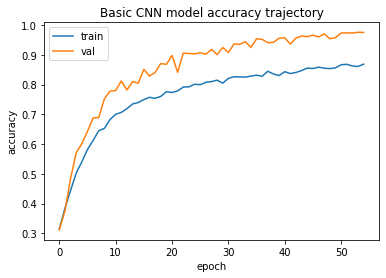

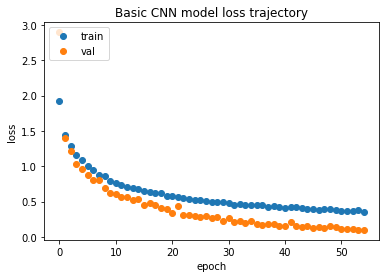

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(basic_cnn_model_results.history['accuracy'])
plt.plot(basic_cnn_model_results.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(basic_cnn_model_results.history['loss'],'o')
plt.plot(basic_cnn_model_results.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Testing the basic CNN model

cnn_score = basic_cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.6992099285125732


In [ ]:
person_test=np.reshape(person_test,(person_test.shape[0],))
print(person_test.shape)
person_train_valid=np.reshape(person_train_valid,(person_train_valid.shape[0],))
print(person_train_valid.shape)
## Preprocessing the dataset
_ , person_test_prep = data_prep(X_test,person_test,2,2,True)
print(person_test_prep.shape)
# person_test = tf.keras.utils.to_categorical(person_test_prep, 9)
person_test= person_test_prep
print('Shape of test labels:',person_test.shape)
for i in range(9):
  score_person = basic_cnn_model.evaluate(x_test[person_test.T==i], y_test[person_test.T==i], verbose=0)
  print("Test accuracy person " + str(i) +  " " + str(score_person[1]))

(443,)
(2115,)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
(1772,)
Shape of test labels: (1772,)
Test accuracy person 0 0.6000000238418579
Test accuracy person 1 0.5299999713897705
Test accuracy person 2 0.7549999952316284
Test accuracy person 3 0.7900000214576721
Test accuracy person 4 0.728723406791687
Test accuracy person 5 0.6581632494926453
Test accuracy person 6 0.7799999713897705
Test accuracy person 7 0.7400000095367432
Test accuracy person 8 0.7446808218955994


In [ ]:
def data_prep(X,y,sub_sample,average,noise):
    total_X = None
    total_y = None
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,:500]
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    total_X = X_max
    total_y = y
    # Averaging + noise
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    # Subsampling
    for i in range(sub_sample):
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
    return total_X,total_y

In [ ]:
import numpy as np


## Loading the dataset


## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3
X_test = np.load("/content/drive/My Drive/Colab Notebooks/project/X_test.npy")
y_test = np.load("/content/drive/My Drive/Colab Notebooks/project/y_test.npy")
person_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/My Drive/Colab Notebooks/project/y_train_valid.npy")
person_test = np.load("/content/drive/My Drive/Colab Notebooks/project/person_test.npy")
y_train_valid -= 769
y_test -= 769
accuracy = []

for idx in range(9):
  X_train_valid_sub = X_train_valid[np.where(person_train_valid == idx)[0]]
  y_train_valid_sub = y_train_valid[np.where(person_train_valid == idx)[0]]
  X_test_sub = X_test[np.where(np.squeeze(person_test) == idx)[0]]
  y_test_sub = y_test[np.where(np.squeeze(person_test) == idx)[0]]
  X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid_sub,y_train_valid_sub,2,2,True)
  X_test_prep,y_test_prep = data_prep(X_test_sub ,y_test_sub,2,2,True)
## Random splitting and reshaping the data
# First generating the training and validation indices using random splitting
  ind_valid = np.random.choice(X_train_valid_sub.shape[0], 50, replace=False)
  ind_train = np.array(list(set(range(X_train_valid_sub.shape[0])).difference(set(ind_valid))))
# Creating the training and validation sets using the generated indices
  (x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid]
  (y_train, y_valid) = y_train_valid_prep[ind_train], y_train_valid_prep[ind_valid]
# Converting the labels to categorical variables for multiclass classification
  y_train = to_categorical(y_train, 4)
  y_valid = to_categorical(y_valid, 4)
  Y_test = to_categorical(y_test_prep, 4)
# Adding width of the segment to be 1
  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
  x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
# Reshaping the training and validation dataset
  x_train = np.swapaxes(x_train, 1,3)
  x_train = np.swapaxes(x_train, 1,2)
  x_valid = np.swapaxes(x_valid, 1,3)
  x_valid = np.swapaxes(x_valid, 1,2)
  x_test = np.swapaxes(x_test, 1,3)
  x_test = np.swapaxes(x_test, 1,2)
  # Model parameters
  learning_rate =  0.00073
  epochs = 80
  cnn_optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
  # Compiling the model
  basic_cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=cnn_optimizer,
                  metrics=['accuracy'])
  basic_cnn_model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)
  cnn_score = basic_cnn_model.evaluate(x_test, Y_test, verbose=0)
  accuracy.append(cnn_score[1])
  print('Test accuracy of the basic CNN model:',cnn_score[1])

Shape of X after trimming: (237, 22, 500)
Shape of X after maxpooling: (237, 22, 250)
Shape of X after averaging+noise and concatenating: (474, 22, 250)
Shape of X after subsampling and concatenating: (948, 22, 250)
Shape of X after trimming: (50, 22, 500)
Shape of X after maxpooling: (50, 22, 250)
Shape of X after averaging+noise and concatenating: (100, 22, 250)
Shape of X after subsampling and concatenating: (200, 22, 250)
Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 2s 270ms/step - loss: 0.3263 - accuracy: 0.8610 - val_loss: 0.5403 - val_accuracy: 0.8000
Epoch 2/80
3/3 [==============================] - 0s 19ms/step - loss: 0.3973 - accuracy: 0.8663 - val_loss: 0.5293 - val_accuracy: 0.8000
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2375 - accuracy: 0.8984 - val_loss: 0.5341 - val_accuracy: 0.8000
Epoch 4/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2161 - accuracy: 0.9198 - val_loss: 0.5415 - val_accuracy: 0.7800
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2850 - accuracy: 0.8877 - val_loss: 0.5470 - val_accuracy: 0.7800
Epoch 6/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2920 - accuracy: 0.8877 - val_loss: 0.5364 - val_accuracy: 0.8000
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.2320 - accuracy: 0.8984 - val_loss: 0.5132 - val_accuracy: 0.8000
Epoch 8/80
3/3 [=====================

In [ ]:
accuracy

[0.6449999809265137,
 0.6650000214576721,
 0.8500000238418579,
 0.7450000047683716,
 0.8244680762290955,
 0.7091836929321289,
 0.7799999713897705,
 0.675000011920929,
 0.7872340679168701]